In [1]:
import tensorflow as tf
from keras.models import Model
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import numpy as np
import time
import keras
from keras.models import Sequential
%load_ext tensorboard
import csv
import PIL
import pathlib
from PIL import Image
from pathlib import Path
from keras.preprocessing import image


E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\pyth

In [2]:
#X_train= np.load('train_data.npy')
#y_train= np.load('train_labels.npy')
#X_test= np.load('test_data.npy')
#y_test= np.load('test_labels.npy')

In [3]:
# split test set into real test set and small validation set
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.08, random_state=10)

In [ ]:
save_folder = "pixel_attack"


In [29]:
NAME = "CNN_pixel_attack"

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

In [30]:
path = 'Optimization Results/'+NAME
model = tf.keras.models.load_model(path)
#model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [31]:
model.layers[0].input_shape 

[(None, 48, 48, 3)]

(48, 48, 3)
4


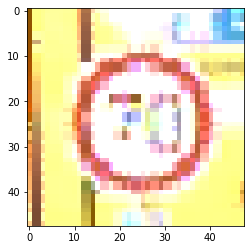

In [91]:
image_path="Training/00004/00002_00006.ppm"


img = image.load_img(image_path, target_size=(48, 48))

im_arr = np.array(img)
im_arr2=np.ones((1,48,48,3))
print(im_arr.shape)
plt.imshow(im_arr)
results=np.zeros(48*48)
im_arr2[0][:] = im_arr[:]
y_prob = model.predict(im_arr2) 
y_classes = y_prob.argmax(axis=-1)
print(y_classes[0])

for j in range (0,48):
    for k in range (0,48):
        im_arr2[0][:] = im_arr[:]
        #print(im_arr2.shape)
        im_arr2[0][j,k,0]=0
        im_arr2[0][j,k,1]=0
        im_arr2[0][j,k,2]=0
        #print(im_arr2.shape)

        
        im_arr = np.expand_dims(im_arr2, axis=0)

        y_prob = model.predict(im_arr2) 
        y_classes = y_prob.argmax(axis=-1)
        #print(y_classes)
        
        results[48*j + k]= y_classes
        #if not y_classes == np.int64(2):
            #print('Speichere')
        
        

In [95]:

results=np.int64(results)
hist = np.histogram(results,bins=41,range=(0,42))


out3=set(results)

print("Different Classes: " + str(len(out3)))
print("Histrogram, the fist array are how often ths clas was predicted:")
print(hist)

Different Classes: 22
Histrogram, the fist array are how often ths clas was predicted:
(array([  76,   50,  187, 1008,   76,    0,  126,    3,  158,   47,    0,
        209,  191,    0,    0,   47,    4,   35,   15,    0,    0,    0,
         12,    0,    3,    2,    0,    0,    0,   17,    0,    0,    0,
          0,   25,    0,    0,    8,    0,    5,    0], dtype=int64), array([ 0.        ,  1.02439024,  2.04878049,  3.07317073,  4.09756098,
        5.12195122,  6.14634146,  7.17073171,  8.19512195,  9.2195122 ,
       10.24390244, 11.26829268, 12.29268293, 13.31707317, 14.34146341,
       15.36585366, 16.3902439 , 17.41463415, 18.43902439, 19.46341463,
       20.48780488, 21.51219512, 22.53658537, 23.56097561, 24.58536585,
       25.6097561 , 26.63414634, 27.65853659, 28.68292683, 29.70731707,
       30.73170732, 31.75609756, 32.7804878 , 33.80487805, 34.82926829,
       35.85365854, 36.87804878, 37.90243902, 38.92682927, 39.95121951,
       40.97560976, 42.        ]))
